<a href="https://colab.research.google.com/github/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/Borrador_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
import pandas as pd
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
import statistics as stats
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chapter 4&5
from sklearn.decomposition import PCA

# Chapter 6
from sklearn.decomposition import IncrementalPCA

# Chapter 7
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

from mpl_toolkits.mplot3d import Axes3D
#from pydiffmap import diffusion_map as dm
#from pydiffmap.visualization import data_plot

# Chapter 8
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import pandas as pd
url="https://github.com/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/train.xlsx?raw=true"
datos=pd.read_excel(url)
url1="https://github.com/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/test.xlsx?raw=true"
test=pd.read_excel(url1)
test

,Ni,Co,Fe,SiO2,MgO,Al2O3,Cr2O3,Mn,Cu,Zn,Na,K,Frente
0,1.19,0.151,41.96,6.96,1.64,5.03,1.98,0.71,NaN,NaN,NaN,NaN,YN
1,1.32,0.074,28.71,21.43,7.19,2.71,1.27,0.57,NaN,NaN,NaN,NaN,YN
2,1.31,0.169,42.99,7.65,1.20,7.63,1.95,1.01,NaN,NaN,NaN,NaN,YN
3,0.82,0.130,37.50,10.27,6.37,8.31,1.16,0.82,NaN,NaN,NaN,NaN,CE
4,1.16,0.150,47.89,2.21,0.42,6.56,NaN,0.89,0.02,0.04,0.03,0.01,CE
5,0.90,0.150,48.20,3.43,2.03,6.15,NaN,1.14,0.02,0.05,0.02,0.00,PG
6,0.68,0.110,42.42,2.77,0.47,12.51,1.39,0.57,0.01,0.02,0.17,0.00,YS
7,1.37,0.110,44.80,4.71,1.70,7.14,1.62,0.64,0.01,0.03,0.11,0.00,CE


In [244]:

datos


,Ni,Co,Fe,SiO2,MgO,Al2O3,Cr2O3,Mn,Cu,Zn,Na,K,Frente
0,1.23,0.130,42.01,8.46,2.98,4.85,2.00,1.00,0.02,0.03,0.21,0.01,YS
1,0.93,0.050,41.59,4.05,0.52,6.05,1.46,0.36,0.02,0.02,0.22,0.01,CE
2,1.10,0.070,44.80,5.87,0.40,14.41,1.35,0.55,0.02,0.02,0.22,0.01,CE
3,1.14,0.080,43.96,5.12,0.96,8.09,1.25,0.57,0.02,0.02,0.22,0.00,CE
4,1.11,0.090,43.98,4.85,0.40,9.99,1.30,0.64,0.02,0.02,0.15,0.01,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,1.58,0.104,26.91,23.36,8.03,2.59,1.22,0.47,NaN,NaN,NaN,NaN,YS
406,1.41,0.184,44.37,6.66,1.46,6.23,1.97,0.85,NaN,NaN,NaN,NaN,CE
407,1.19,0.151,41.96,6.96,1.64,5.03,1.98,0.71,NaN,NaN,NaN,NaN,YS
408,1.32,0.074,28.71,21.43,7.19,2.71,1.27,0.57,NaN,NaN,NaN,NaN,YN


In [363]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
datos = datos.dropna(how='all')
datos2 = datos.fillna(0)
datos2
Y= datos2['Frente']
X = datos2.drop(['Frente'], axis=1)

In [364]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [367]:

sc = StandardScaler()
#X = X.values
X_std =  sc.fit_transform(X)  
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(X_std)

[[ 0.55139609  0.22157057  0.25856523 ...  0.84345981  4.4599928
   3.27326835]
 [-0.46298798 -1.17096706  0.20735536 ...  0.28748148  4.70031309
   3.27326835]
 [ 0.11182966 -0.82283265  0.59874507 ...  0.28748148  4.70031309
   3.27326835]
 ...
 [ 0.41614488  0.58711169  0.25246882 ... -0.82447518 -0.58673318
  -0.30550505]
 [ 0.85571131 -0.75320577 -1.36308061 ... -0.82447518 -0.58673318
  -0.30550505]
 [ 0.82189851  0.90043266  0.37805492 ... -0.82447518 -0.58673318
  -0.30550505]]


In [368]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained)


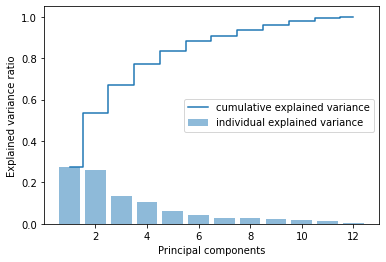

In [369]:
plt.bar(range(1,len(var_explained)+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_explained)+1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [370]:
pca = PCA(n_components = 4)
pca.fit(X_std)
x_pca = pca.transform(X_std)
pca.explained_variance_ratio_

array([0.27550825, 0.25805712, 0.13663797, 0.10351221])

In [371]:
pca.explained_variance_ratio_.sum()

0.7737155521659975

In [372]:
pca = PCA(n_components = 0.7)
pca.fit(X_std)
x_pca = pca.transform(X_std)
pca.n_components_

4

In [373]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4).fit(X)
principal_comps = pca.transform(X)
pca_db = pd.DataFrame(data = principal_comps, columns=['pca1', 'pca2','pca3','pc4'])
pca_db

,pca1,pca2,pca3,pc4
0,0.737316,0.698601,0.719285,-0.010372
1,0.610184,0.720336,0.785614,0.323007
2,0.635562,0.637213,0.963922,0.320655
3,0.405307,0.060654,0.247454,0.440372
4,0.570029,0.565871,0.802545,0.120463
...,...,...,...,...
405,-0.329345,0.337803,-0.417363,-0.175802
406,-0.356915,-0.119831,0.069536,-0.269952
407,-0.373878,-0.073413,0.021939,-0.153107
408,-0.344144,0.297431,-0.370298,-0.067625


In [374]:
pca_db.var()

pca1    0.236608
pca2    0.096076
pca3    0.068178
pc4     0.034985
dtype: float64

In [375]:
# Adicionemos ahora la columna con la clase correcta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


FRENTE_MAPEO = {'YS':1, 'CE':2,'YN':3,'PG':4 ,'NA':5,'0':6}

Y = Y.map(FRENTE_MAPEO).astype(int)

pca_db['class']=Y

pca_db

,pca1,pca2,pca3,pc4,class
0,0.737316,0.698601,0.719285,-0.010372,1
1,0.610184,0.720336,0.785614,0.323007,2
2,0.635562,0.637213,0.963922,0.320655,2
3,0.405307,0.060654,0.247454,0.440372,2
4,0.570029,0.565871,0.802545,0.120463,2
...,...,...,...,...,...
405,-0.329345,0.337803,-0.417363,-0.175802,1
406,-0.356915,-0.119831,0.069536,-0.269952,2
407,-0.373878,-0.073413,0.021939,-0.153107,1
408,-0.344144,0.297431,-0.370298,-0.067625,3


Se formaron 4 columnas que contienen la mayor cantidad de información que es el "resumen" de los comportamientos de todos los quimicos en las muestras.Pero sería interesante conocer que combinación de variables conforman a las componentes.

In [376]:
pca.components_


array([[ 0.0063283 ,  0.11853627,  0.03995598,  0.00509041,  0.03217151,
         0.00774944, -0.40045169,  0.02977244,  0.43705084,  0.71951677,
         0.23602009,  0.23983409],
       [ 0.12720052, -0.23696605, -0.36822478,  0.34197604,  0.39008037,
        -0.11585284,  0.0566685 , -0.11624485, -0.09320072, -0.1610885 ,
         0.26105662,  0.62452768],
       [-0.0920886 ,  0.11552335,  0.28408969, -0.23638199, -0.47081944,
         0.3399964 ,  0.30877947,  0.07807448,  0.02192236, -0.12999053,
         0.24407986,  0.57090162],
       [-0.40983239, -0.67800436, -0.02772561, -0.02441106, -0.11050034,
         0.20394986,  0.05550575, -0.38882179,  0.15008718,  0.05766245,
         0.28932176, -0.2309882 ]])

Como se logra observar en los componentes , existen compuestos quimicos que influyen más en cada componente:

PCA1: Zn,Cu,Cr203(Siendo el Cr203 el que mas información distinta al resto aporta) 

PCA2:K,MgO,Fe(Siendo el Fe el que aporta más información diferente del resto)

PCA3:K,AL203,Cr203  

PCA4:Co,Mn




In [390]:
print(pca.explained_variance_ratio_)

[0.45618553 0.18523679 0.13144913 0.06745093]


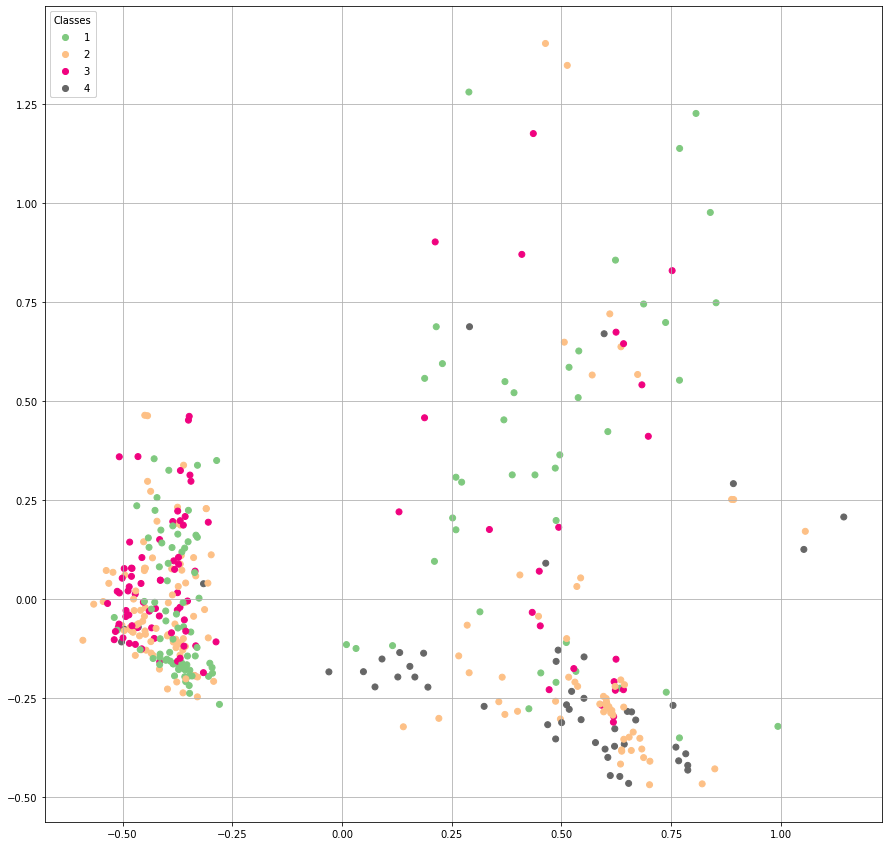

In [391]:
# y visualicemos el resultado
fig, ax = plt.subplots(figsize=(15, 15))
scatter = ax.scatter(pca_db['pca1'], pca_db['pca2'],c=pca_db['class'], cmap="Accent")
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Classes")
ax.add_artist(legend1)
ax.grid(True)
plt.show()

In [393]:
y_test= test['Frente']
y_test=y_test.map(FRENTE_MAPEO).astype(int)
x_test= test.drop(['Frente'], axis=1)
x_test =x_test.fillna(0)
scaler = MinMaxScaler()
x_test = scaler.fit_transform(x_test)#A los valores de prueba hayn que normalizarlos tambien
y_test,x_test


(0    3
 1    3
 2    3
 3    2
 4    2
 5    4
 6    1
 7    2
 Name: Frente, dtype: int64,
 array([[0.73913043, 0.81052632, 0.67983581, 0.2471384 , 0.18020679,
         0.23673469, 1.        , 0.24561404, 0.        , 0.        ,
         0.        , 0.        ],
        [0.92753623, 0.        , 0.        , 1.        , 1.        ,
         0.        , 0.64141414, 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.91304348, 1.        , 0.73268343, 0.2830385 , 0.11521418,
         0.50204082, 0.98484848, 0.77192982, 0.        , 0.        ,
         0.        , 0.        ],
        [0.20289855, 0.58947368, 0.45100051, 0.41935484, 0.8788774 ,
         0.57142857, 0.58585859, 0.43859649, 0.        , 0.        ,
         0.        , 0.        ],
        [0.69565217, 0.8       , 0.98409441, 0.        , 0.        ,
         0.39285714, 0.        , 0.56140351, 1.        , 0.8       ,
         0.17647059, 1.        ],
        [0.31884058, 0.8       , 1.        , 0.

In [394]:
# Entrenemos el modelo
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000, tol=1e-3)
model.fit(x_train, y_train)

SGDClassifier()

In [395]:
from sklearn import metrics
predicted_train = model.predict(x_train)
metrics.accuracy_score(y_train, predicted_train)

0.823170731707317

In [396]:
#Llevando los componentes de pruba al mismo redimensionamiento que los de entrenamiento
x_reduced=pca_db
x_train, x_test, y_train, y_test = train_test_split(x_reduced, Y, test_size = 0.2, random_state = 1) 


In [398]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), PCA(n_components=4), SGDClassifier(max_iter=10000, tol=1e-3))    

pipe.fit(x_train, y_train)
pipe_test = pipe.predict(x_test)
metrics.accuracy_score(y_test, pipe_test)

0.6341463414634146

Con una correlación del 0.67073 con los datos de prueba (que no participan en el entrenamiento del sistema) y luego de varios intentos se procede a mantener 4 componentes principales.

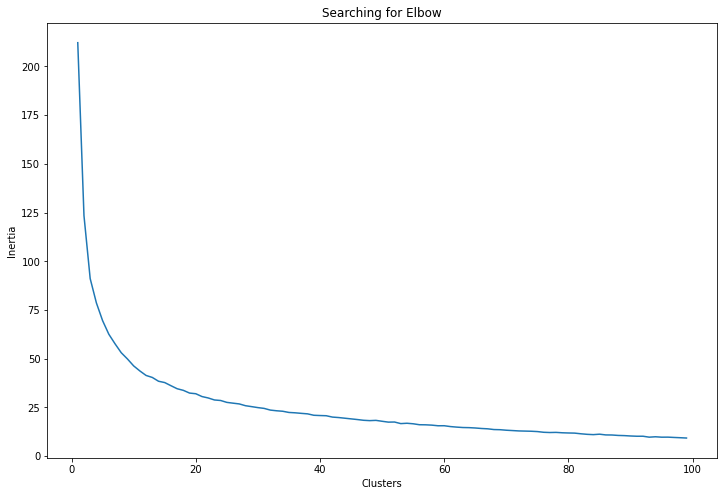

In [399]:
import seaborn as sn
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 100):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sn.lineplot(x=list(range(1, 100)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [400]:
X = pca_db
X

,pca1,pca2,pca3,pc4,class
0,0.737316,0.698601,0.719285,-0.010372,1
1,0.610184,0.720336,0.785614,0.323007,2
2,0.635562,0.637213,0.963922,0.320655,2
3,0.405307,0.060654,0.247454,0.440372,2
4,0.570029,0.565871,0.802545,0.120463,2
...,...,...,...,...,...
405,-0.329345,0.337803,-0.417363,-0.175802,1
406,-0.356915,-0.119831,0.069536,-0.269952,2
407,-0.373878,-0.073413,0.021939,-0.153107,1
408,-0.344144,0.297431,-0.370298,-0.067625,3


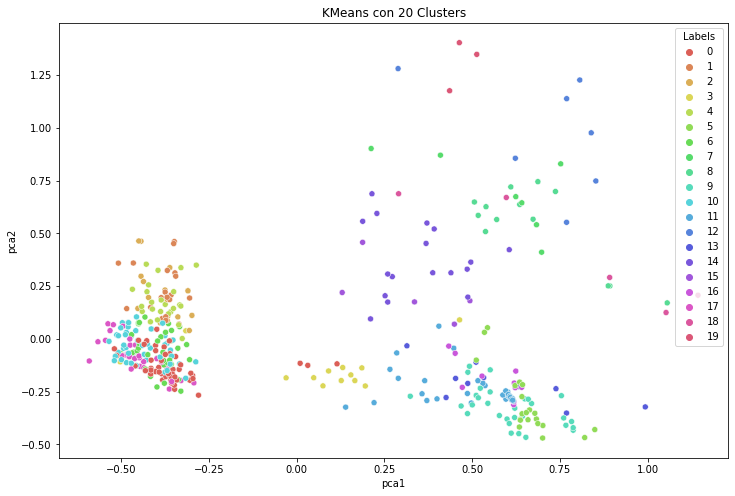

In [405]:
# 20 cluster
km20= KMeans(n_clusters=20).fit(X)

X['Labels'] = km20.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['pca1'], y=X['pca2'], hue=X['Labels'], 
                palette=sn.color_palette('hls',20), cmap="Dark1")
plt.title('KMeans con 20 Clusters')
plt.show()

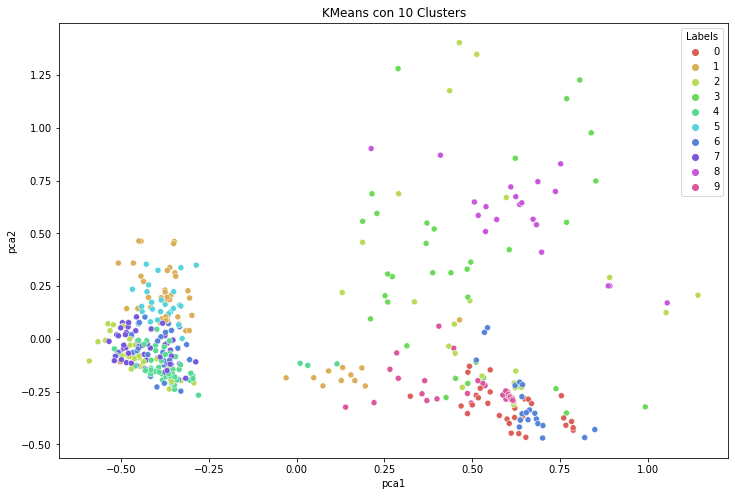

In [406]:
# 10 cluster
km10= KMeans(n_clusters=10).fit(X)

X['Labels'] = km10.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['pca1'], y=X['pca2'], hue=X['Labels'], 
                palette=sn.color_palette('hls', 10),cmap="Dark1")
plt.title('KMeans con 10 Clusters')
plt.show()

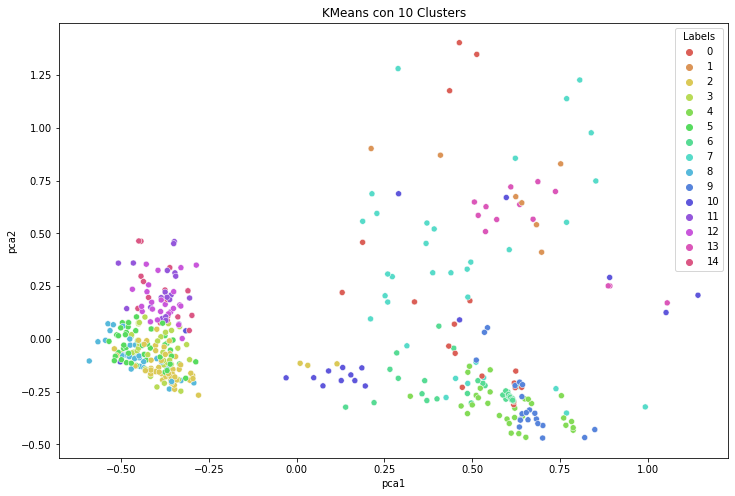

In [407]:
# 10 cluster
km15 = KMeans(n_clusters=15).fit(X)

X['Labels'] = km15.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['pca1'], y=X['pca2'], hue=X['Labels'], 
                palette=sn.color_palette('hls', 15))
plt.title('KMeans con 10 Clusters')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; y

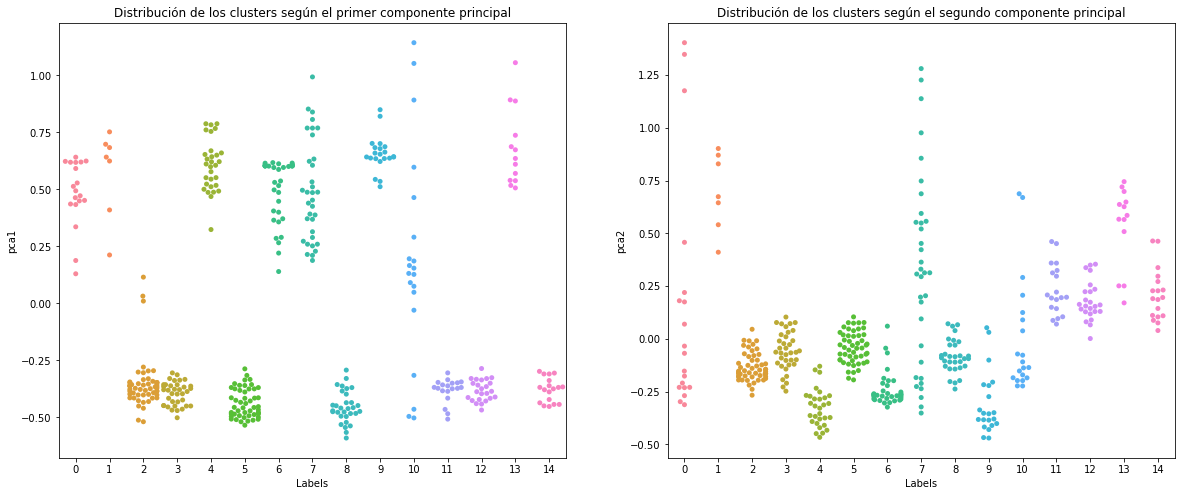

In [408]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sn.swarmplot(x='Labels', y='pca1', data=X, ax=ax)
ax.set_title('Distribución de los clusters según el primer componente principal')

ax = fig.add_subplot(122)
sn.swarmplot(x='Labels', y='pca2', data=X, ax=ax)
ax.set_title('Distribución de los clusters según el segundo componente principal')
plt.show()